# Open Exploration - Dimensional Stacking

### Loading the experiments

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Dimensional stacking

In [3]:
# import the ema_workbench necessary tools
from ema_workbench.analysis import dimensional_stacking

In [4]:

uncertainties = ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2']

In [5]:
metrics = df_outcomes_no_policy.columns
print(metrics)

Index(['Gelderland Expected Annual Damage', 'Gelderland Dike Investment Costs',
       'Gelderland Expected Number of Deaths',
       'Overijssel Expected Annual Damage', 'Overijssel Dike Investment Costs',
       'Overijssel Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs'],
      dtype='object')


### 1 - Without policies

Create a function that takes the experiments, outcomes, list of uncertainties and the target metric and the percentile as input and creates the appropriate dimensional stacking plots.

In [118]:
# define a function to quickly create dimensional stacking plots

def plot_dimensional_stacking(experiments_df, outcomes_df, uncertainties, target_metric, nbins=5, nr_levels=2, percentile=10):
    print('Analysis for metric:', target_metric)

    # prepare the data for dimensional stacking
    x = experiments_df[uncertainties]
    data = outcomes_df[target_metric]
    y = data > np.percentile(data, percentile) # focus on the worst percentile outcomes, if set at percentile=10, means 10% worst outcomes
    y = y.to_numpy()

    # create the dimensional stacking plot
    dimensional_stacking.create_pivot_plot(x=x, y=y, nr_levels=nr_levels, labels=True, categories=True, nbins=nbins, bin_labels=False)
    plt.title(f'Dimensional Stacking for {target_metric} at {percentile}th Percentile')

    return

#### Based on the 7,500 runs sample

In [102]:
# import data (samples) 

# import the dike_model_experiments.csv file
df_experiments_no_policy_7k = pd.read_csv('experiments(no policy)_10k.csv')

# import the dike_model_outcomes.csv file
df_outcomes_no_policy_7k = pd.read_csv('outcomes(no policy)_10k.csv')

Analysis for metric: Overijssel Expected Annual Damage


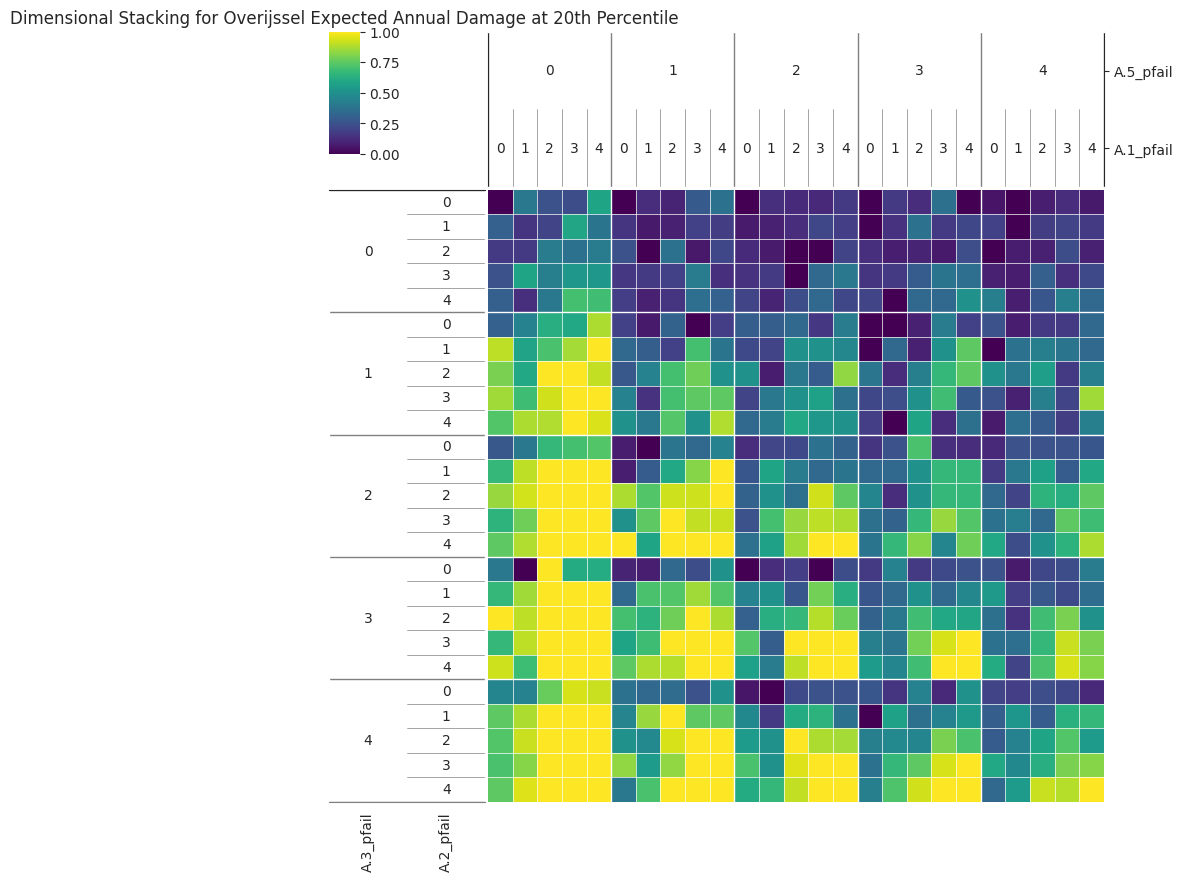

In [103]:
plot_dimensional_stacking(df_experiments_no_policy_7k, df_outcomes_no_policy_7k, uncertainties,  'Overijssel Expected Annual Damage', percentile=20) 

Analysis for metric: Overijssel Expected Number of Deaths


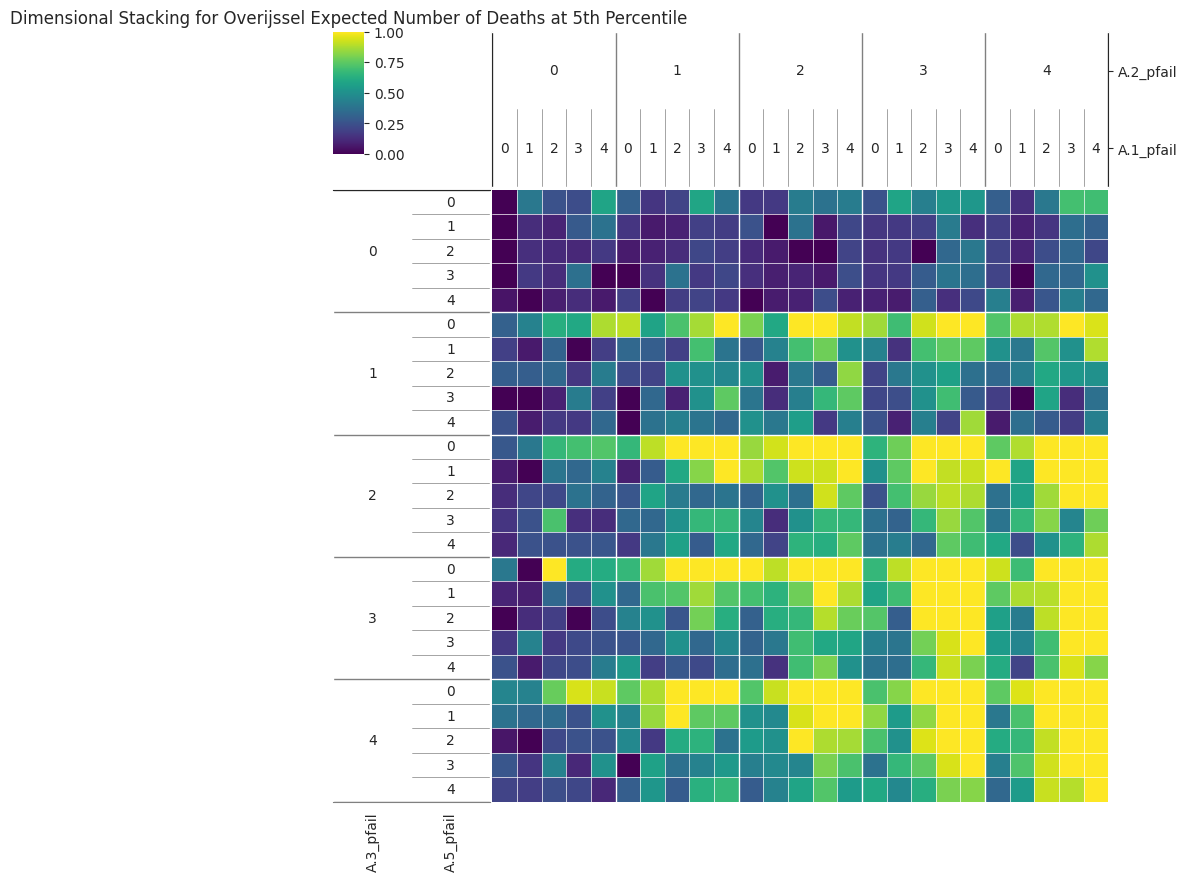

In [104]:
plot_dimensional_stacking(df_experiments_no_policy_7k, df_outcomes_no_policy_7k, uncertainties, 'Overijssel Expected Number of Deaths', percentile=5)

### 2 - With Policies

In [ ]:
df_experiments_policy = pd.read_csv('experiments(policy).csv') # sample size of 25k
df_outcomes_policy = pd.read_csv('outcomes(policy).csv')

In [99]:
df_experiments_policy.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

Analysis for metric: Overijssel Expected Annual Damage


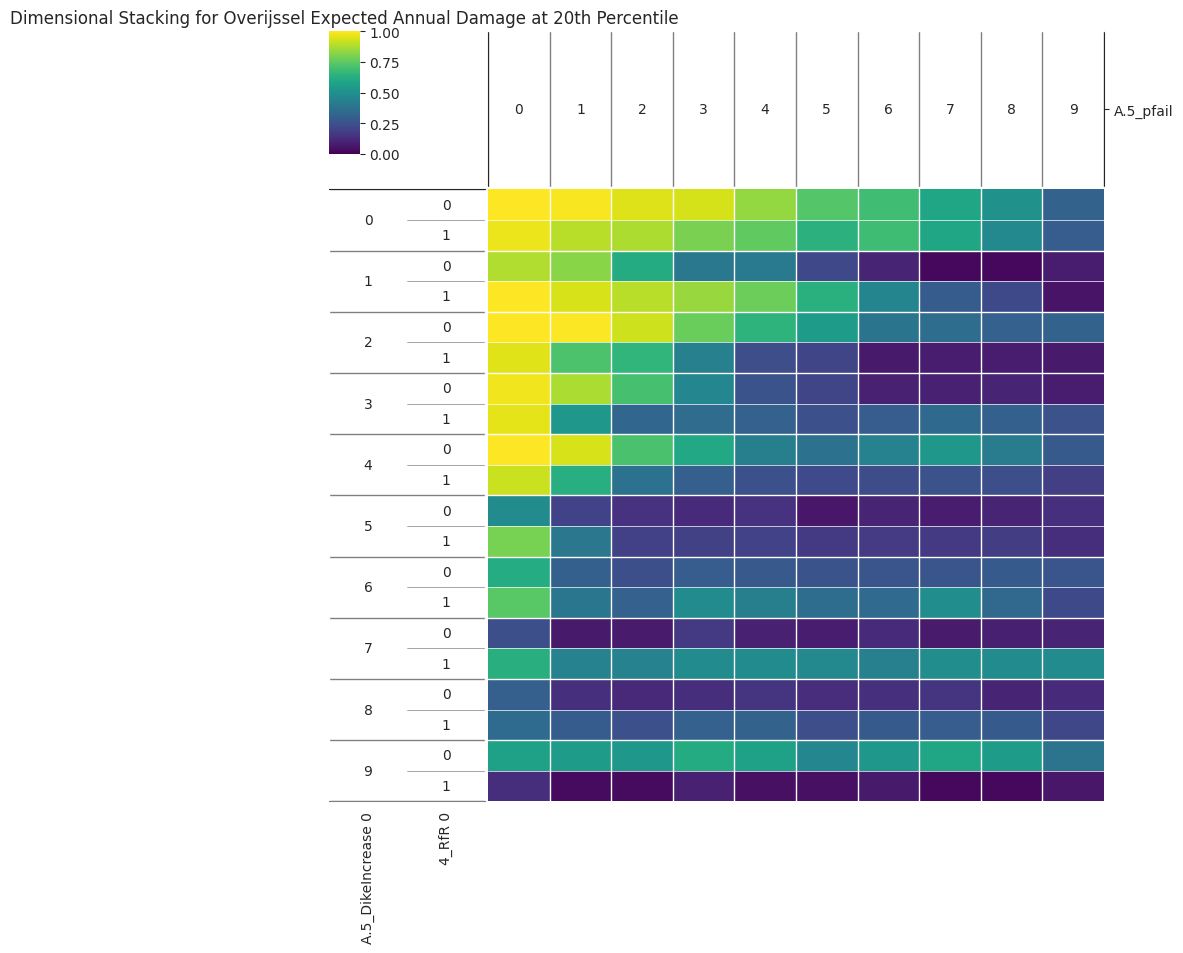

In [123]:
variables = ['A.5_pfail', '4_RfR 0', 'A.5_DikeIncrease 0']

plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, variables, 'Overijssel Expected Annual Damage', nbins=10, nr_levels=2, percentile=20)

Analysis for metric: Overijssel Expected Number of Deaths


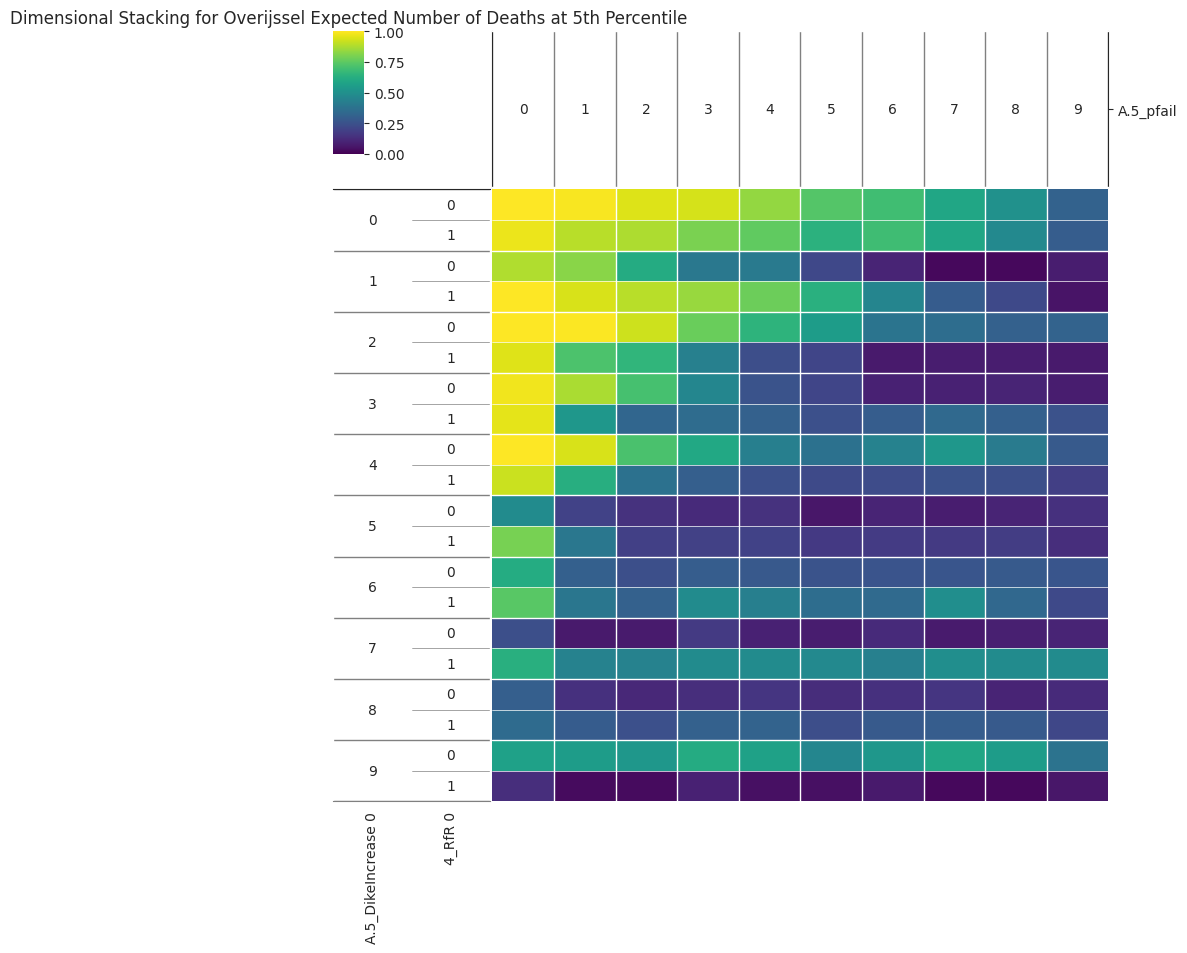

In [124]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, variables, 'Overijssel Expected Number of Deaths', nr_levels=2, nbins=10, percentile=5)